In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
print(sys.path)

['/Users/marvzhang/projects/tikazyq/auto-html/notebooks', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/marvzhang/projects/tikazyq/auto-html/venv/lib/python3.10/site-packages', '/Users/marvzhang/projects/tikazyq/auto-html']


In [2]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import dgl

from dataset import GraphLoader

In [3]:
data_dir_path = os.path.abspath('../data/quotes.toscrape.com')
loader = GraphLoader(data_dir_path)
loader.run()

/Users/marvzhang/projects/tikazyq/auto-html/venv/lib/python3.10/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'
/Users/marvzhang/projects/tikazyq/auto-html/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Graph(num_nodes=24258, num_edges=24258,
      ndata_schemes={'feat': Scheme(shape=(379,), dtype=torch.int32)}
      edata_schemes={})
tensor([[   51,     0,    53,  ...,    51,     0,    53],
        [   52,    51,     0,  ...,    52,    51,     0],
        [   53,    52,    51,  ...,    53,    52,    51],
        ...,
        [19950, 19947, 19946,  ...,     0,    53,    52],
        [19951, 19950, 19947,  ...,    51,     0,    53],
        [19952, 19950, 19947,  ...,    51,     0,    53]])
torch.Size([24258, 11])


In [4]:
X_feat = loader.nodes_features_tensor.numpy()
X_feat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [5]:
X_embed = loader.nodes_embedded_tensor.numpy()
X_embed

array([[   51,     0,    53, ...,    51,     0,    53],
       [   52,    51,     0, ...,    52,    51,     0],
       [   53,    52,    51, ...,    53,    52,    51],
       ...,
       [19950, 19947, 19946, ...,     0,    53,    52],
       [19951, 19950, 19947, ...,    51,     0,    53],
       [19952, 19950, 19947, ...,    51,     0,    53]])

In [6]:
i = 100
X_feat[np.array(list(filter(lambda x: x > 0, X_embed[i])))]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [7]:
loader.feat_enc.feature_names_

['accept-charset=utf-8',
 'action=/login',
 'aria-hidden=true',
 'class=author',
 'class=author-born-date',
 'class=author-born-location',
 'class=author-description',
 'class=author-details',
 'class=author-title',
 'class=btn',
 'class=btn-primary',
 'class=col-md-4',
 'class=col-md-8',
 'class=col-xs-3',
 'class=container',
 'class=copyright',
 'class=footer',
 'class=form-control',
 'class=form-group',
 'class=header-box',
 'class=keywords',
 'class=next',
 'class=pager',
 'class=previous',
 'class=quote',
 'class=row',
 'class=sh-red',
 'class=tag',
 'class=tag-item',
 'class=tags',
 'class=tags-box',
 'class=text',
 'class=text-muted',
 'content=',
 'content=abilities,choices',
 'content=activism,apathy,hate,indifference,inspirational,love,opposite,philosophy',
 'content=adulthood,success,value',
 'content=adventure,love',
 'content=age,fairytales,growing-up',
 'content=alcohol',
 'content=aliteracy,books,classic,humor',
 'content=attributed,fear,inspiration',
 'content=attribute

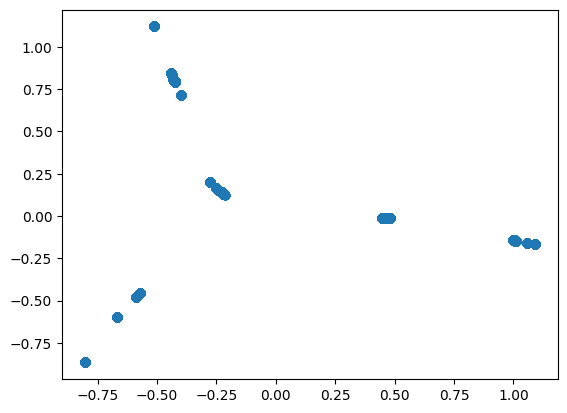

In [8]:
pca = PCA(n_components=2)
X_feat_pca_2d = pca.fit_transform(X_feat)
plt.scatter(X_feat_pca_2d[:,0], X_feat_pca_2d[:,1])